In [1]:
from typing import Union
from datetime import datetime, timedelta
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
import cv2
from sklearn.cluster import DBSCAN
import math
from datetime import timedelta
from scipy.ndimage import convolve
from tqdm import tqdm

from src import dasly, helper

In [20]:
# folder_path = '/mnt/Datastore/usr/kptruong/Svalbard_whale/dphi_1220'
folder_path = '/mnt/Datastore/usr/kptruong/Svalbard_whale/20220822'
file_paths = helper.find_hdf5(folder_path)
# file_paths = file_paths[8:8+6]
# file_paths = file_paths[0:6]

len(file_paths)

61

In [3]:
das = dasly.Dasly()
das.load_data(file_paths=file_paths)
print(das.signal.shape)

Welcome to Dasly!
(37500, 12500)


In [ ]:
das.decimate(frequency=25)
das.heatmap()

Downsampling factor: 5
New sampling rate: 125
vmin: -4.7e-08, vmax: 4.7e-08


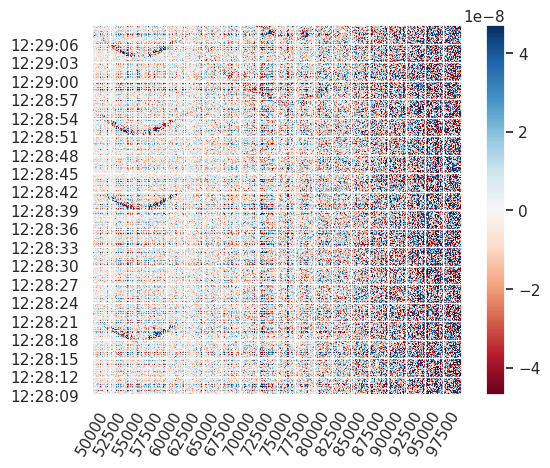

In [4]:
das.bandpass_filter(15, 25)
das.decimate(frequency=25)
das.heatmap()

In [12]:
das.signal.shape[1] / 250

50.0

vmax: 3.24e-08


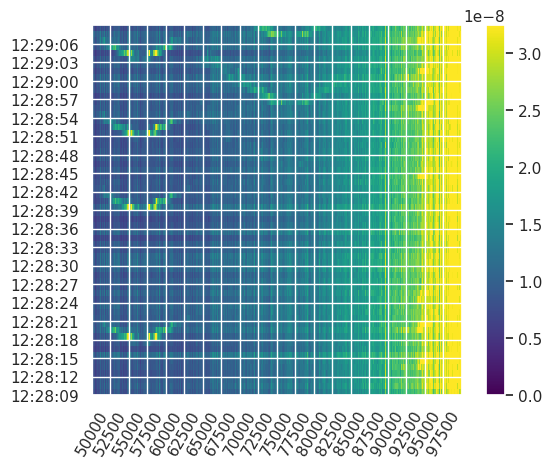

In [13]:
das.signal = das.signal.abs()
das.sample(seconds=1, channels=100, func_name='mean')
das.heatmap()

vmax: 1.7e-08


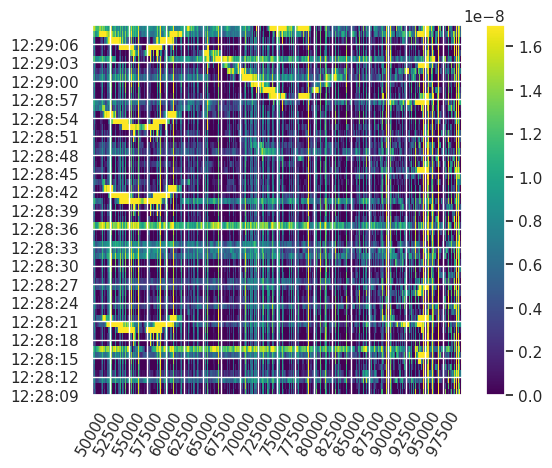

In [15]:
das.sobel_filter()
das.heatmap()

threshold: 1.2299466368150853e-08


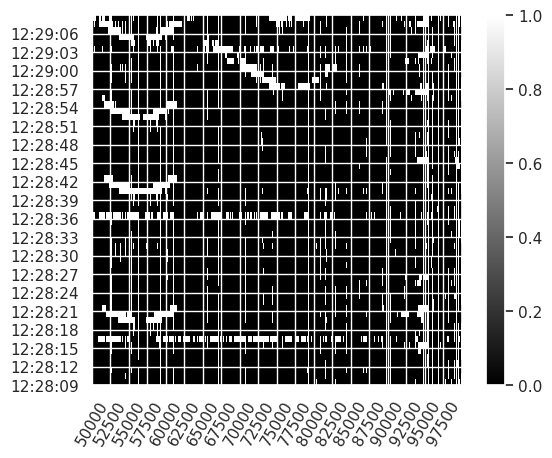

In [16]:
das.binary_filter()
das.heatmap()

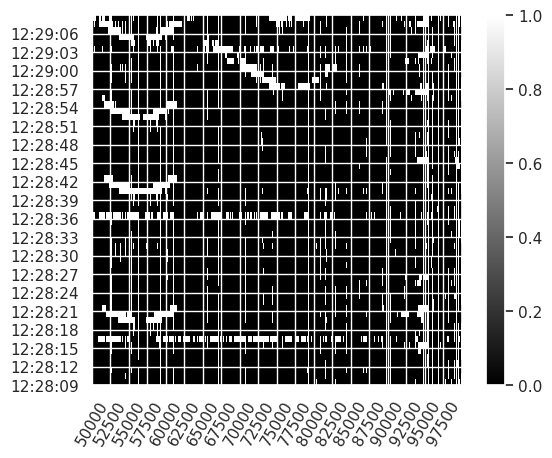

In [17]:
das.hough_transform()
das.heatmap()

In [18]:
das.lines